In [15]:
# Load libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np

warnings.filterwarnings("ignore")

### Feature importance

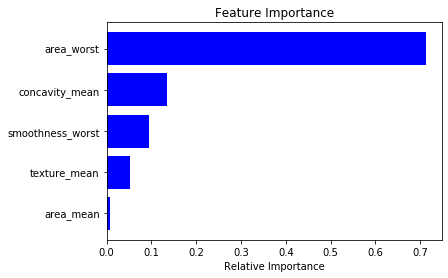

In [17]:
# Split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

# Define DT model
dt_model = DecisionTreeClassifier(random_state=0, min_samples_split=2, min_samples_leaf=3).fit(X_train, y_train)

# Feature importance
importances = dt_model.feature_importances_
indices = np.argsort(importances)

features = X_train.columns
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Plot area_worst vs the rest of the features

In [18]:
def scatter_plot(df_train, variables, target, x_indx, y_indx):
    X_train = df_train[variables].values # Array of features
    y_train = df_train[target].values # Array of target 
    X_labels = df_train[variables].columns # feature names
    y_label = df_train[target].name # target
    num_plots = len(x_indx)

    if num_plots % 2 == 0:
        f, axs = plt.subplots(num_plots // 2, 2)
    else:
        f, axs = plt.subplots(num_plots// 2 + 1, 2)
      
    f.subplots_adjust(hspace=.3)
    f.set_figheight(10.0)
    f.set_figwidth(10.0)
    
    for i in range(num_plots):
        if i % 2 == 0:
            x_idx = i // 2
            y_idx = 0
        else:
            x_idx = i // 2
            y_idx = 1
          
        axs[x_idx,y_idx].plot(X_train[y_train == "M", x_indx[i]], 
                              X_train[y_train == "M", y_indx[i]], 'rx', label="Malign")
        axs[x_idx,y_idx].plot(X_train[y_train == "B", x_indx[i]], 
                              X_train[y_train == "B", y_indx[i]], 'b+',label="Benign") 
      
        axs[x_idx,y_idx].legend()
        axs[x_idx,y_idx].set_xlabel('%s' % X_labels[x_indx[i]])
        axs[x_idx,y_idx].set_ylabel('%s' % X_labels[y_indx[i]])
        axs[x_idx,y_idx].set_title('Malign vs benign tumors')
        axs[x_idx,y_idx].grid(True)
      
    if num_plots % 2 != 0:
        f.delaxes(axs[i // 2, 1])

In [19]:
# Unpickle data
data = pd.read_pickle('data')

# Separate target and features
target = 'diagnosis'
y = data[target]
X = data.drop(columns=[target])

# Feature list
features_DT_list = ['texture_mean', 'area_worst', 'smoothness_worst', 'area_mean', 'concavity_mean']
X = X[features_DT_list]

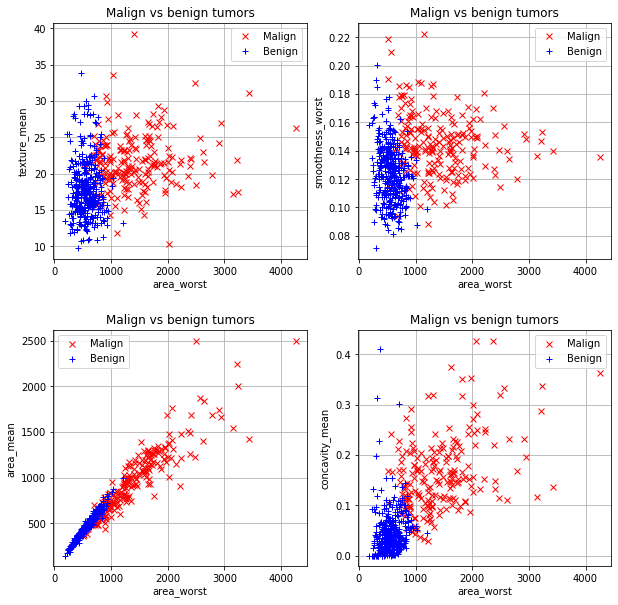

In [20]:
# define vectors for plotting x and y
x_indx = [1, 1, 1, 1] # vector for plotting axis x
y_indx = [0, 2, 3, 4] # vector for plotting axis y

# call function
scatter_plot(data, features_DT_list, target, x_indx, y_indx)